# Module 2 Feature Engineering & EDA

Yiheng Shen ys3323

This script contains five parts:
1. Data Cleaning: Clean data for modelling
2. Feature Selection: Use Decision Tree to see the top 15 variables
3. EDA: Do exploratory data analysis of the top 15 variables
4. Model Evaluation: Evaluate the model using Confusion Matrix, ROC Curve, Gains Table, Cumulative Lift, and Komogorov-Smirnov (K-S)
5. Summary

In [1]:
# import packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

## 1. Data Cleaning

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
#load data
df = pd.read_csv('XYZloan_default_selected_vars.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,PA022,PA023,PA028,PA029,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,4,3,2,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,7,6,11,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,2,2,2,3,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,5,7,7,8,-1.0,-1.0,-98.0,-98.0,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,0,0,6,8,7,11,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [4]:
# glimpse of the dataset
# df.info()

In [5]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'TD044', 'TD048',
                        'TD051', 'TD054', 'TD055', 'TD061', 'TD062'])

In [6]:
df.isnull().any()

id              False
loan_default    False
AP001           False
AP002           False
AP003           False
                ...  
CD170            True
CD172            True
CD173            True
MB005            True
MB007           False
Length: 80, dtype: bool

In [8]:
df = df.fillna(df.mean())

In [9]:
label = LabelEncoder()
MB007 = label.fit_transform(df['MB007'])
MB007 = pd.Series(MB007)
df['MB007'] = MB007

AP005 = label.fit_transform(df['AP005'])
AP005 = pd.Series(AP005)
df['AP005'] = AP005

AP006 = label.fit_transform(df['AP006'])
AP006 = pd.Series(AP006)
df['AP006'] = AP006

In [12]:
df.isnull().any().sum()

0

### #CheckPoint 1
#### After dropping columns, filling missing values with mean value, and lable encoder, there is no missing values. The dataset is good for modelling now.

## 2. Feature Selection

### split data

In [13]:
X = df.drop(columns=['loan_default'])
y = df['loan_default'].copy()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Decision Tree

In [14]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

Text(0.5, 0, 'Relative Importance')

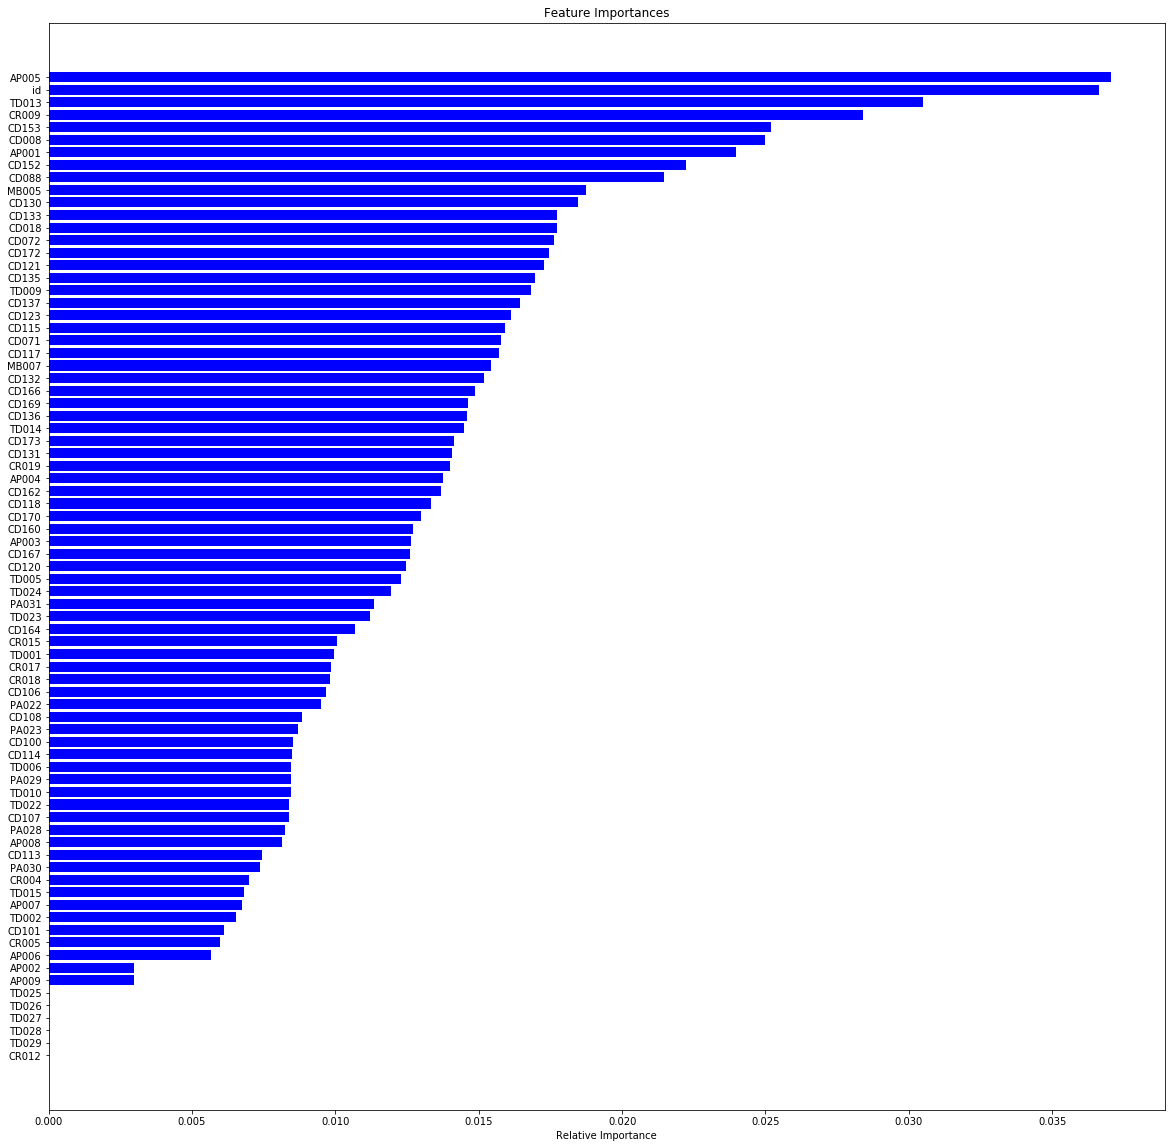

In [15]:
# plot feature importance
features=X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### #CheckPoint 2

#### Top 15 features are:  
AP005, TD013, CR009, CD153, CD008, AP001, CD152, CD088, MB005, CD130, CD133, CD018, CD072, CD172, CD121

## 3. Exploratory Data Analysis

In [23]:
# load original data
df = pd.read_csv('XYZloan_default_selected_vars.csv')

In [29]:
# split data into default or not
df_0 = df[df['loan_default'] == 0]
df_1 = df[df['loan_default'] == 1]

### No.1 AP005

In [57]:
AP005_0 = pd.to_datetime(df_0['AP005'])
AP005_1 = pd.to_datetime(df_1['AP005'])

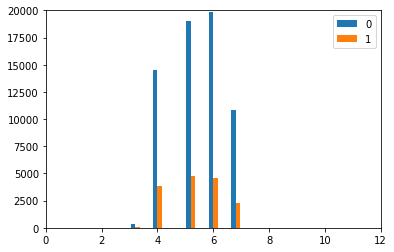

In [64]:
# visualize month distribution
AP005_0_month = AP005_0.dt.month
AP005_1_month = AP005_1.dt.month

plt.hist([AP005_0_month, AP005_1_month], label=['0', '1'])
plt.axis([0, 12, 0, 20000])
plt.legend(loc='upper right')
plt.show()

default rate each month show same pattern 

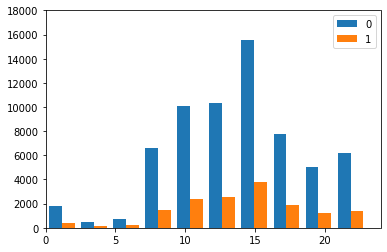

In [67]:
# visualize hour distribution
AP005_0_hour = AP005_0.dt.hour
AP005_1_hour = AP005_1.dt.hour

plt.hist([AP005_0_hour, AP005_1_hour], label=['0', '1'])
plt.axis([0, 24, 0, 18000])
plt.legend(loc='upper right')
plt.show()

default rate rises between 20:00 to 24:00

### No.2 TD013

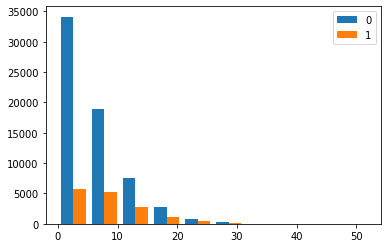

In [84]:
# visualize TD013 distribution
TD013_0 = df_0['TD013']
TD013_1 = df_1['TD013']

plt.hist([TD013_0, TD013_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


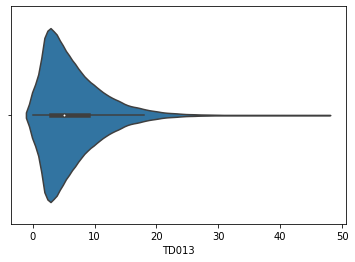

In [144]:
violin0 = pd.Series(df_0['TD013'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


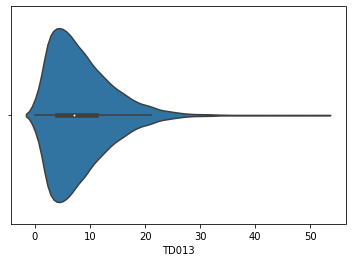

In [145]:
violin1 = pd.Series(df_1['TD013'])
sns.violinplot(violin1)

the number of P2P queres have a higher propotion in defaults

### No.3 CR009

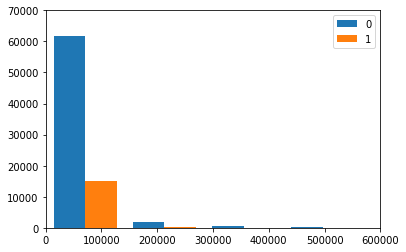

In [97]:
# visualize CR009 distribution
CR009_0 = df_0['CR009']
CR009_1 = df_1['CR009']

plt.axis([0, 600000, 0, 70000])
plt.hist([CR009_0, CR009_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

the percent of defaults have a higher propotion between 0 to 30000

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


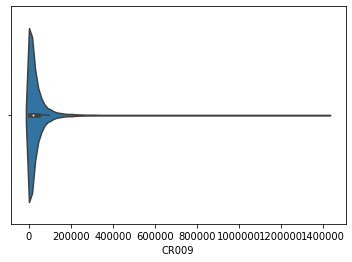

In [146]:
violin0 = pd.Series(df_0['CR009'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


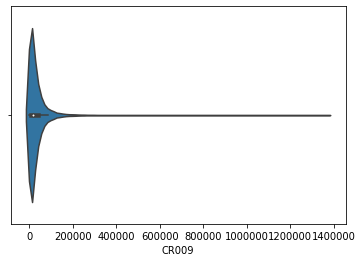

In [147]:
violin1 = pd.Series(df_1['CR009'])
sns.violinplot(violin1)

### No.4 CD153

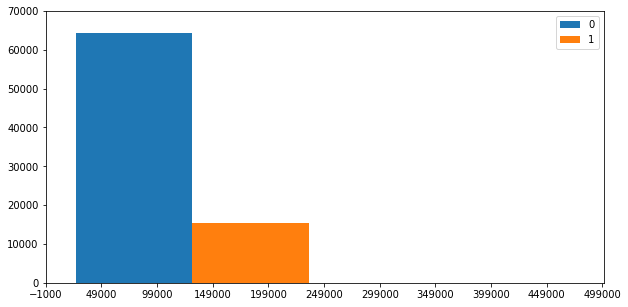

In [148]:
# visualize CD153 distribution
CD153_0 = df_0['CD153']
CD153_1 = df_1['CD153']

plt.figure(figsize=(10, 5))
plt.axis([0, 500000, 0, 70000])
my_x_ticks = np.arange(-1000, 500000, 50000)
plt.xticks(my_x_ticks)
plt.hist([CD153_0, CD153_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


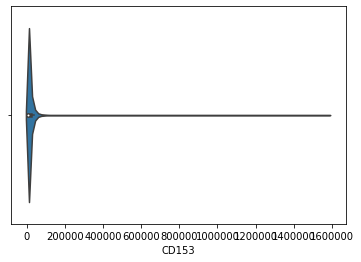

In [150]:
violin0 = pd.Series(df_0['CD153'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


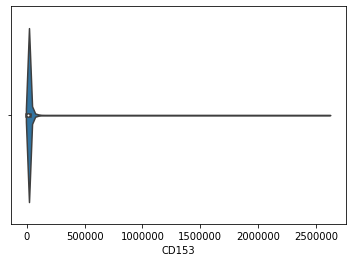

In [151]:
violin1 = pd.Series(df_1['CD153'])
sns.violinplot(violin1)

### No.5 CD008

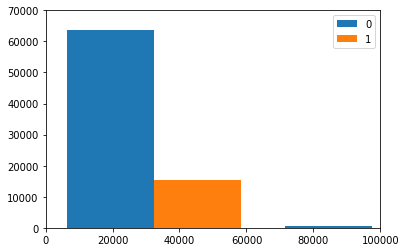

In [116]:
# visualize CD008 distribution
CD008_0 = df_0['CD008']
CD008_1 = df_1['CD008']

plt.axis([0, 100000, 0, 70000])
plt.hist([CD008_0, CD008_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

### No.6 AP001

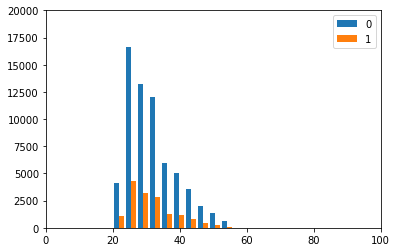

In [119]:
# visualize CD008 distribution
AP001_0 = df_0['AP001']
AP001_1 = df_1['AP001']

plt.axis([0, 100, 0, 20000])
plt.hist([AP001_0, AP001_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

higher default rate among age 30-40

### No.7 CD152

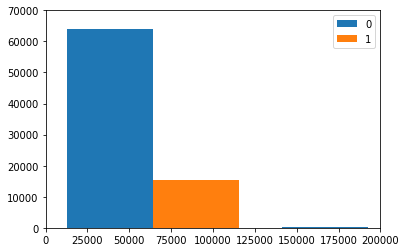

In [122]:
# visualize CD008 distribution
CD152_0 = df_0['CD152']
CD152_1 = df_1['CD152']

plt.axis([0, 200000, 0, 70000])
plt.hist([CD152_0, CD152_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

### No8.CD088

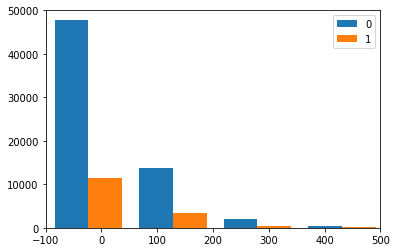

In [126]:
# visualize CD008 distribution
CD088_0 = df_0['CD088']
CD088_1 = df_1['CD088']

plt.axis([-100, 500, 0, 50000])
plt.hist([CD088_0, CD088_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

### No.9 MB005

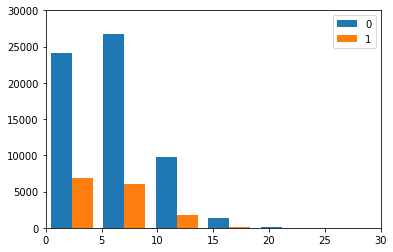

In [130]:
# visualize CD008 distribution
MB005_0 = df_0['MB005']
MB005_1 = df_1['MB005']

plt.axis([0, 30, 0, 30000])
plt.hist([MB005_0, MB005_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

the fewer years of phone being active, the higher default rate

### No.10 CD130

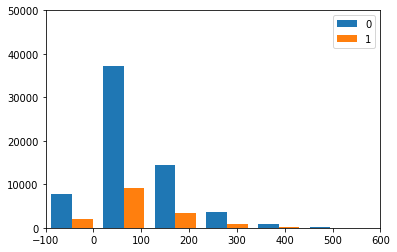

In [132]:
# visualize CD130 distribution
CD130_0 = df_0['CD130']
CD130_1 = df_1['CD130']

plt.axis([-100, 600, 0, 50000])
plt.hist([CD130_0, CD130_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

### No.11 CD133

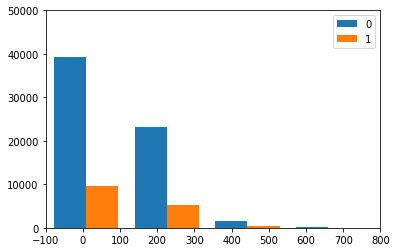

In [134]:
# visualize CD133 distribution
CD133_0 = df_0['CD133']
CD133_1 = df_1['CD133']

plt.axis([-100, 800, 0, 50000])
plt.hist([CD133_0, CD133_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

both CD130 and CD133 are more centralized between 100 and 300

### No.12 CD018

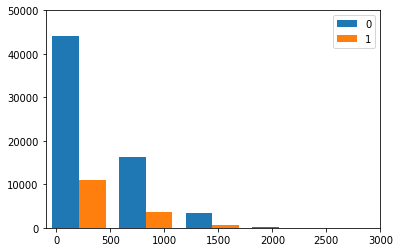

In [138]:
# visualize CD018 distribution
CD018_0 = df_0['CD018']
CD018_1 = df_1['CD018']

plt.axis([-100, 3000, 0, 50000])
plt.hist([CD018_0, CD018_1], label=['0', '1'])
plt.legend(loc='upper right')
plt.show()

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


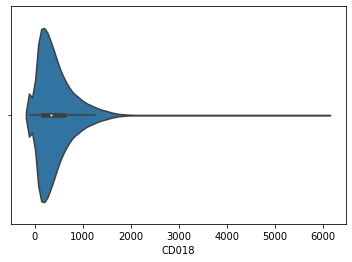

In [139]:
violin0 = pd.Series(df_0['CD018'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


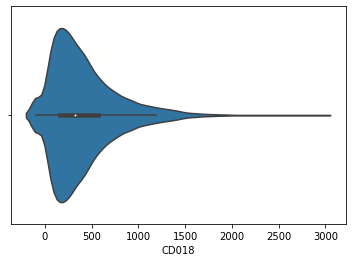

In [141]:
violin1 = pd.Series(df_1['CD018'])
sns.violinplot(violin1)

CD018 of defaults are relatively larger

### No.13 CD072

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


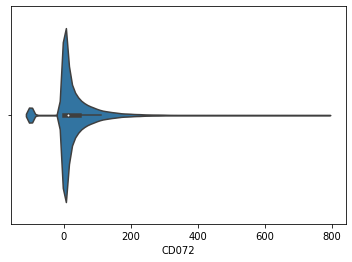

In [154]:
violin0 = pd.Series(df_0['CD072'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


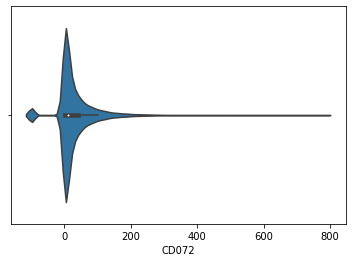

In [152]:
violin1 = pd.Series(df_1['CD072'])
sns.violinplot(violin1)

### No.14 CD172

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


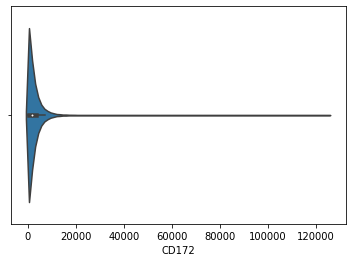

In [156]:
violin0 = pd.Series(df_0['CD172'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


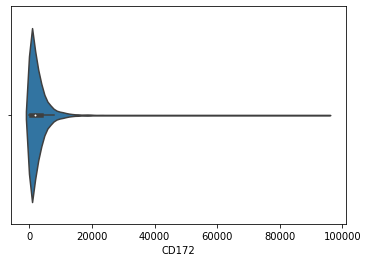

In [157]:
violin1 = pd.Series(df_1['CD172'])
sns.violinplot(violin1)

### No.15 CD121

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


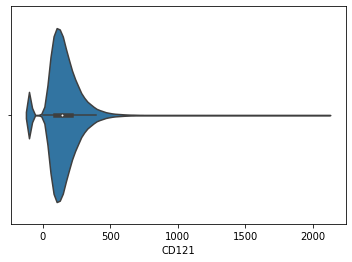

In [158]:
violin0 = pd.Series(df_0['CD121'])
sns.violinplot(violin0)

/Users/yihengshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


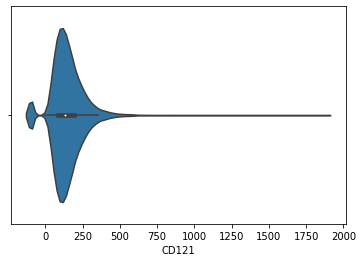

In [159]:
violin1 = pd.Series(df_1['CD121'])
sns.violinplot(violin1)

default recordings have fewer negative values

## 4. Model Evaluation

In [18]:
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

### Confusion Matrix

In [19]:
confusion

array([[12900,  3238],
       [ 2829,  1033]])

### ROC Curve

In [20]:
roc_auc_value = roc_auc_score(y_test,y_pred)
roc_auc_value

0.5334167744939925

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
[fpr,tpr]

[array([0.        , 0.20064444, 1.        ]),
 array([0.        , 0.26747799, 1.        ])]

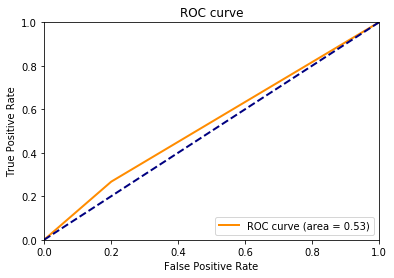

In [22]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### Gains Table

In [160]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
39452,0,1,0
39867,0,1,1
38658,1,1,2
48191,0,1,3
21401,1,1,4


In [161]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

9    2000
8    2000
7    2000
6    2000
5    2000
4    2000
3    2000
2    2000
1    2000
0    2000
Name: decile, dtype: int64

In [162]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2000,485
1,2000,475
2,2000,388
3,2000,360
4,2000,365
5,2000,346
6,2000,374
7,2000,338
8,2000,362


In [163]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2000,485,1515,2000,485,1515,0.13,0.09,386.2,1.26,4.0,24.25
1,2000,475,1525,4000,960,3040,0.25,0.19,772.4,1.24,6.0,24.00
2,2000,388,1612,6000,1348,4652,0.35,0.29,1158.6,1.16,6.0,22.47
3,2000,360,1640,8000,1708,6292,0.44,0.39,1544.8,1.11,5.0,21.35
4,2000,365,1635,10000,2073,7927,0.54,0.49,1931.0,1.07,5.0,20.73
5,2000,346,1654,12000,2419,9581,0.63,0.59,2317.2,1.04,4.0,20.16
6,2000,374,1626,14000,2793,11207,0.72,0.69,2703.4,1.03,3.0,19.95
7,2000,338,1662,16000,3131,12869,0.81,0.80,3089.6,1.01,1.0,19.57
8,2000,362,1638,18000,3493,14507,0.90,0.90,3475.8,1.00,0.0,19.41


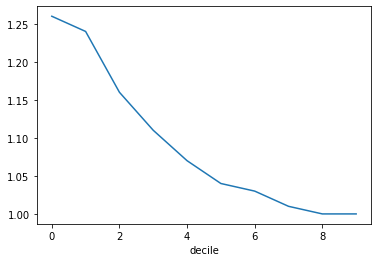

In [164]:
def gains_table(y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(y_test,y_pred)
gains
gains['lift'].plot.line()

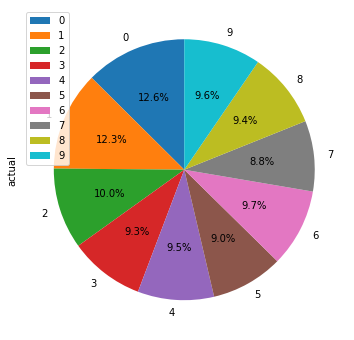

In [166]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

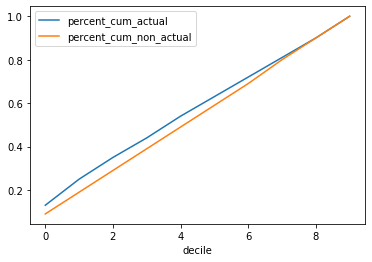

In [167]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

## 5. Summary

AP005 (by hour), CR009, AP001, MB005, and CD018 show certain patterns in EDA, which means date(hour), total loan amount, age, and lengths of total calls may make a difference in default rate